# Example-33: Orbit (sextupole shift)

In [1]:
# In this example effects of transverse sextupole shifts on closed orbit are illustrated
# Surrogate model from derivatives is compared with direct tracking

In [2]:
# Import

from pprint import pprint

import torch

from pathlib import Path

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
matplotlib.rcParams['text.usetex'] = True

from twiss import twiss

from model.library.line import Line

from model.command.util import chop
from model.command.util import evaluate
from model.command.util import series

from model.command.external import load_lattice

from model.command.build import build

from model.command.wrapper import group

from model.command.orbit import orbit
from model.command.orbit import parametric_orbit

In [3]:
# Build and setup lattice

path = Path('ic.lte')
data = load_lattice(path)

ring:Line = build('RING', 'ELEGANT', data)
ring.propagate = True
ring.flatten()
ring.merge()
ring.split((None, ['BPM'], None, None))
ring.roll(1)
ring.splice()

In [4]:
# Compute closed orbit

fp = 1.0E-3*torch.randn(4, dtype=torch.float64)
fp, *_ = orbit(ring, fp, [], alignment=True, limit=8, epsilon=1.0E-12)

# Chop small values

fp = [fp]
chop(fp)
fp, *_ = fp

print(fp)

tensor([0., 0., 0., 0.], dtype=torch.float64)


In [5]:
# Compute 1st order parametric closed orbit at the first BPM
# Note, all 1st order derivatives are zero

n_sext = ring.describe['Sextupole']

dx = torch.tensor(n_sext*[0.0], dtype=torch.float64)
dy = torch.tensor(n_sext*[0.0], dtype=torch.float64)

data, *_ = parametric_orbit(ring, fp, [dx], (1, 'dx', ['Sextupole'], None, None), alignment=True, advance=False,  full=False,  jacobian=torch.func.jacrev)
chop(data)
pprint(data)
print()

data, *_ = parametric_orbit(ring, fp, [dy], (1, 'dy', ['Sextupole'], None, None), alignment=True, advance=False,  full=False,  jacobian=torch.func.jacrev)
chop(data)
pprint(data)
print()

[[tensor([0., 0., 0., 0.], dtype=torch.float64),
  tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=torch.float64)]]

[[tensor([0., 0., 0., 0.], dtype=torch.float64),
  tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=torch.float64)]]



In [6]:
# d^2(qx,px,qy,py)/d^2(dx)

n_sext = ring.describe['Sextupole']

dx = torch.tensor(n_sext*[0.0], dtype=torch.float64)
dy = torch.tensor(n_sext*[0.0], dtype=torch.float64)

data_xx, *_ = parametric_orbit(ring, fp, [dx], (1 + 1, 'dx', ['Sextupole'], None, None), alignment=True, advance=True,  full=False,  jacobian=torch.func.jacfwd)
chop(data_xx)

In [7]:
# d^2(qx,px,qy,py)/d^2(dy)

n_sext = ring.describe['Sextupole']

dx = torch.tensor(n_sext*[0.0], dtype=torch.float64)
dy = torch.tensor(n_sext*[0.0], dtype=torch.float64)

data_yy, *_ = parametric_orbit(ring, fp, [dy], (1 + 1, 'dy', ['Sextupole'], None, None), alignment=True, advance=True,  full=False,  jacobian=torch.func.jacfwd)
chop(data_yy)

In [8]:
# d^2(qx,px,qy,py)/d(dx)d(dy)

n_sext = ring.describe['Sextupole']

dx = torch.tensor(n_sext*[0.0], dtype=torch.float64)
dy = torch.tensor(n_sext*[0.0], dtype=torch.float64)

data_xy, *_ = parametric_orbit(ring, fp, [dx, dy], (1, 'dx', ['Sextupole'], None, None), (1, 'dy', ['Sextupole'], None, None), alignment=True, advance=True,  full=False,  jacobian=torch.func.jacfwd)
chop(data_xy)

tensor([ 1.0033e-07, -1.1509e-06, -6.3080e-07, -9.2672e-07],
       dtype=torch.float64)
tensor([ 1.0033e-07, -1.1509e-06, -6.3080e-07, -9.2672e-07],
       dtype=torch.float64)
True

tensor([ 9.5113e-08, -1.1528e-06, -6.3283e-07, -9.3303e-07],
       dtype=torch.float64)



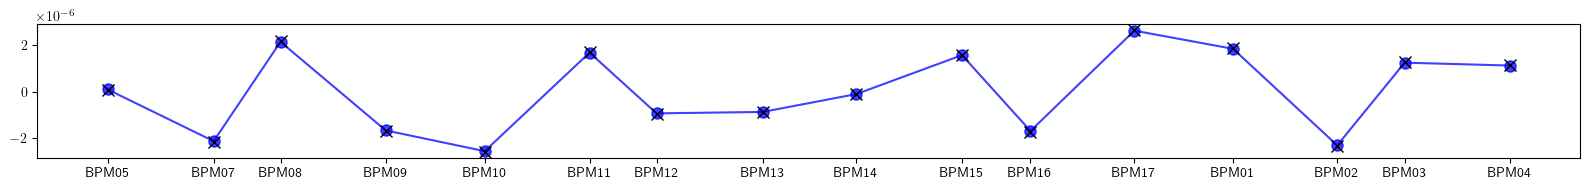

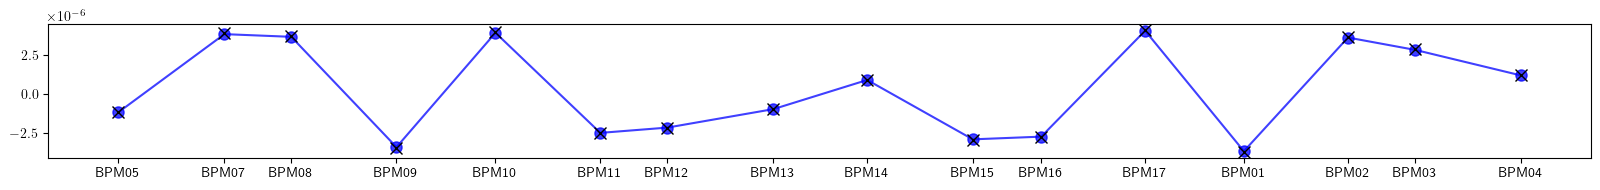

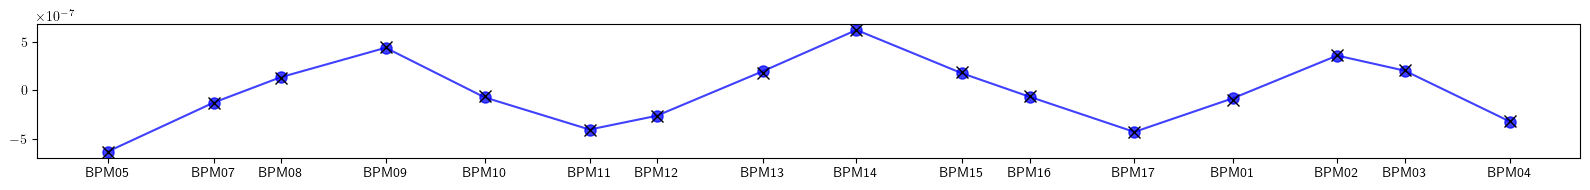

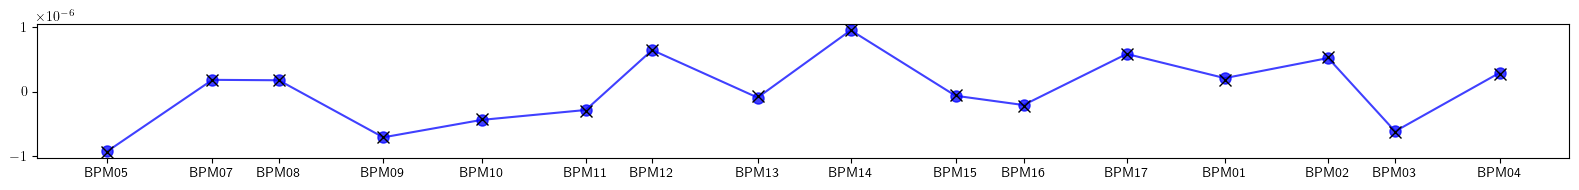

tensor([ 5.2183e-09,  2.1902e-08, -2.7206e-08,  2.2594e-08,  3.1393e-08,
        -2.2313e-08,  2.3693e-08, -3.3437e-09, -1.3831e-08, -1.1931e-08,
         2.4838e-08, -2.8452e-08, -2.4680e-08,  2.7076e-08, -1.9813e-08,
        -7.3490e-09], dtype=torch.float64)

tensor([ 1.9981e-09, -4.2481e-08, -4.5641e-08,  4.3854e-08, -4.9479e-08,
         3.5591e-08,  4.2046e-08, -1.6313e-08,  1.6608e-08,  2.8780e-08,
         3.1764e-08, -4.6591e-08,  4.4813e-08, -3.7277e-08, -4.0012e-08,
        -2.4356e-09], dtype=torch.float64)

tensor([ 2.0286e-09,  5.3450e-09,  5.4072e-09, -3.5832e-09, -1.2731e-08,
         7.8904e-10,  6.6626e-09,  1.5498e-08,  1.2892e-09, -8.5067e-09,
        -1.0284e-08,  4.1416e-09,  1.9376e-08, -1.4913e-09, -4.8998e-09,
        -7.5837e-09], dtype=torch.float64)

tensor([ 6.3099e-09,  9.0244e-09, -6.9332e-09, -4.2968e-09, -1.6105e-08,
         1.0479e-08, -2.5487e-09, -2.5606e-08, -3.8375e-09, -1.7324e-08,
         1.0369e-08,  8.5195e-09,  2.5380e-08, -1.5626e-08,  4.46

In [9]:
# Compare orbit responce for a single random realization

# Set errors

dx = 100.0E-6*torch.randn(n_sext, dtype=torch.float64)
dy = 100.0E-6*torch.randn(n_sext, dtype=torch.float64)

# Compute closed orbit at all BPMs
# Note, alignment is on

points, *_ = orbit(ring, fp, [dx, dy], ('dx', ['Sextupole'], None, None), ('dy', ['Sextupole'], None, None), alignment=True, advance=True, full=False, limit=16, epsilon=1.0E-12)


# Test closed orbit

# Set parametric ring

start, *_, end = ring.names
mapping, *_ = group(ring, start, end, ('dx', ['Sextupole'], None, None), ('dy', ['Sextupole'], None, None), alignment=True)

# Propagate estimated closed orbit

point, *_ = points
print(point)
print(mapping(point, dx, dy))
print(torch.allclose(point, mapping(point, dx, dy), rtol=1.0E-12, atol=1.0E-12))
print()

# Evaluate parametric fixed point for given deviations

def taylor(lxx, lxy, lyy, dx, dy):
    return evaluate(lxx, [fp, dx]) + evaluate(lxy, [fp, dx, dy]) + evaluate(lyy, [fp, dy])

lxx, *_ = data_xx
lxy, *_ = data_xy
lyy, *_ = data_yy

print(taylor(lxx, lxy, lyy, dx, dy))
print()

# Plot orbit at all locations

qx, px, qy, py = points.T
Qx, Px, Qy, Py = torch.stack([taylor(lxx, lxy, lyy, dx, dy) for lxx, lxy, lyy in zip(data_xx, data_xy, data_yy)]).T

# qx vs Qx

plt.figure(figsize=(16, 2))
plt.errorbar(ring.locations().cpu().numpy(), qx.cpu().numpy(), fmt='-', color='blue', marker='o', ms=8, alpha=0.75)
plt.errorbar(ring.locations().cpu().numpy(), Qx.cpu().numpy(), fmt=' ', color='black', marker='x', ms=8, alpha=1)
plt.xticks(ticks=ring.locations(), labels=dict.fromkeys([name for name, kind, *_ in ring.layout() if kind == 'BPM']))
plt.tight_layout()
plt.show()

# px vs Px

plt.figure(figsize=(16, 2))
plt.errorbar(ring.locations().cpu().numpy(), px.cpu().numpy(), fmt='-', color='blue', marker='o', ms=8, alpha=0.75)
plt.errorbar(ring.locations().cpu().numpy(), Px.cpu().numpy(), fmt=' ', color='black', marker='x', ms=8, alpha=1)
plt.xticks(ticks=ring.locations(), labels=dict.fromkeys([name for name, kind, *_ in ring.layout() if kind == 'BPM']))
plt.tight_layout()
plt.show()

# qy vs Qy

plt.figure(figsize=(16, 2))
plt.errorbar(ring.locations().cpu().numpy(), qy.cpu().numpy(), fmt='-', color='blue', marker='o', ms=8, alpha=0.75)
plt.errorbar(ring.locations().cpu().numpy(), Qy.cpu().numpy(), fmt=' ', color='black', marker='x', ms=8, alpha=1)
plt.xticks(ticks=ring.locations(), labels=dict.fromkeys([name for name, kind, *_ in ring.layout() if kind == 'BPM']))
plt.tight_layout()
plt.show()

# py vs Py

plt.figure(figsize=(16, 2))
plt.errorbar(ring.locations().cpu().numpy(), py.cpu().numpy(), fmt='-', color='blue', marker='o', ms=8, alpha=0.75)
plt.errorbar(ring.locations().cpu().numpy(), Py.cpu().numpy(), fmt=' ', color='black', marker='x', ms=8, alpha=1)
plt.xticks(ticks=ring.locations(), labels=dict.fromkeys([name for name, kind, *_ in ring.layout() if kind == 'BPM']))
plt.tight_layout()
plt.show()

# Accuracy

print(qx - Qx)
print()

print(px - Px)
print()

print(qy - Qy)
print()

print(py - Py)
print()

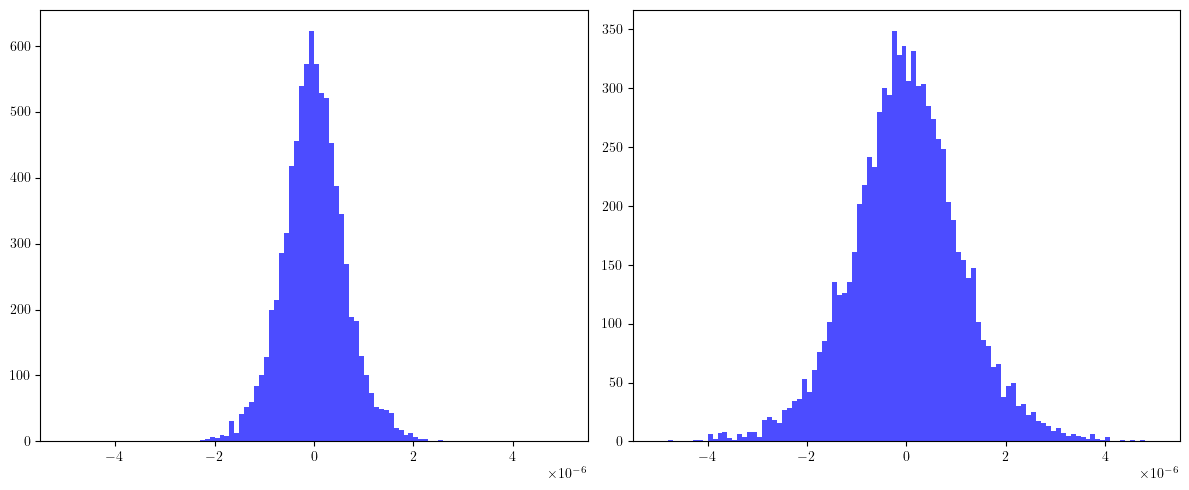

In [10]:
# Estimate center and spread at all BPM using direct tracking and MC sampling
# Note, epsilon should be None for vmap, convergence not checked

def fn(dx, dy):
    guess = torch.tensor(4*[0.0], dtype=torch.float64)
    point, _ = orbit(ring, guess,  [dx, dy], ('dx', ['Sextupole'], None, None), ('dy', ['Sextupole'], None, None), alignment=True, advance=True, full=False, limit=16, epsilon=None)
    return point

dxs = 100.0E-6*torch.randn((8192, n_sext), dtype=torch.float64)
dys = 100.0E-6*torch.randn((8192, n_sext), dtype=torch.float64)

cqxs, cpxs, cqys, cpys = torch.vmap(fn)(dxs, dys).swapaxes(0, -1)

# Plot histogram at the first BPM for qx and qy

cqx, *_ = cqxs
cqy, *_ = cqys

fig, (ax, ay) = plt.subplots(1, 2, figsize=(12, 5))
ax.hist(cqx.cpu().numpy(), bins=100, range=(-5E-6, +5E-6), color='blue', alpha=0.7)
ay.hist(cqy.cpu().numpy(), bins=100, range=(-5E-6, +5E-6), color='blue', alpha=0.7)
plt.tight_layout() 
plt.show()

# Estimate center and spread at all BPMs

qx_center_tracking = cqxs.mean(-1)
qy_center_tracking = cqys.mean(-1)

qx_spread_tracking = cqxs.std(-1)
qy_spread_tracking = cqys.std(-1)

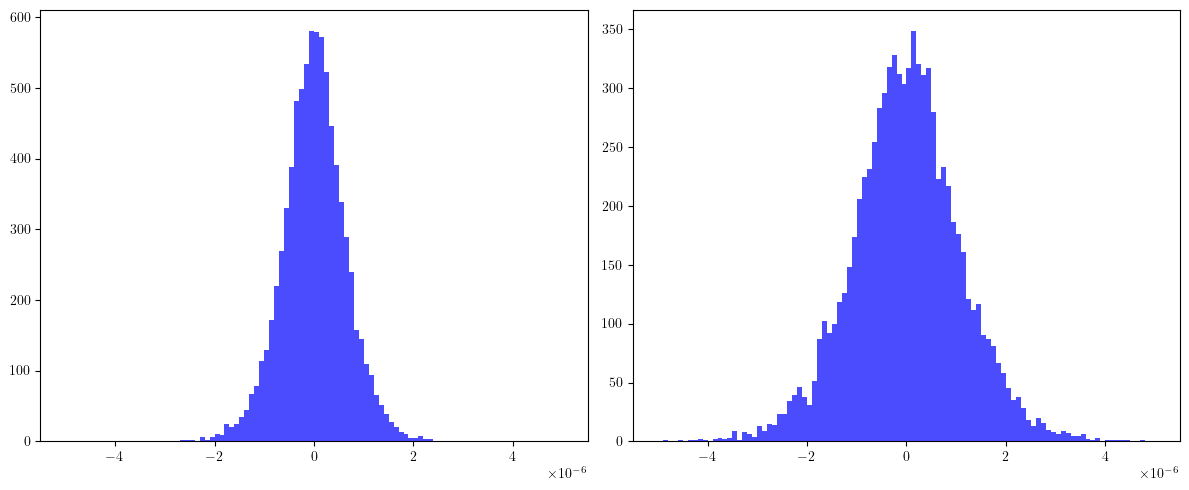

In [11]:
# Estimate center and spread at all BPM using series and MC sampling

dxs = 100.0E-6*torch.randn((8192, n_sext), dtype=torch.float64)
dys = 100.0E-6*torch.randn((8192, n_sext), dtype=torch.float64)

def taylor(lxx, lxy, lyy, dx, dy):
    return evaluate(lxx, [fp, dx]) + evaluate(lxy, [fp, dx, dy]) + evaluate(lyy, [fp, dy])

cqxs, cpxs, cqys, cpys = torch.stack([torch.vmap(lambda dx, dy: taylor(lxx, lxy, lyy, dx, dy))(dxs, dys) for lxx, lxy, lyy in zip(data_xx, data_xy, data_yy)]).swapaxes(0, -1)

# Plot histogram at the first BPM for qx and qy

cqx, *_ = cqxs.T
cqy, *_ = cqys.T

fig, (ax, ay) = plt.subplots(1, 2, figsize=(12, 5))
ax.hist(cqx.cpu().numpy(), bins=100, range=(-5E-6, +5E-6), color='blue', alpha=0.7)
ay.hist(cqy.cpu().numpy(), bins=100, range=(-5E-6, +5E-6), color='blue', alpha=0.7)
plt.tight_layout() 
plt.show()

# Estimate center and spread at all BPMs

qx_center_taylor = cqxs.T.mean(-1)
qy_center_taylor = cqys.T.mean(-1)

qx_spread_taylor = cqxs.T.std(-1)
qy_spread_taylor = cqys.T.std(-1)

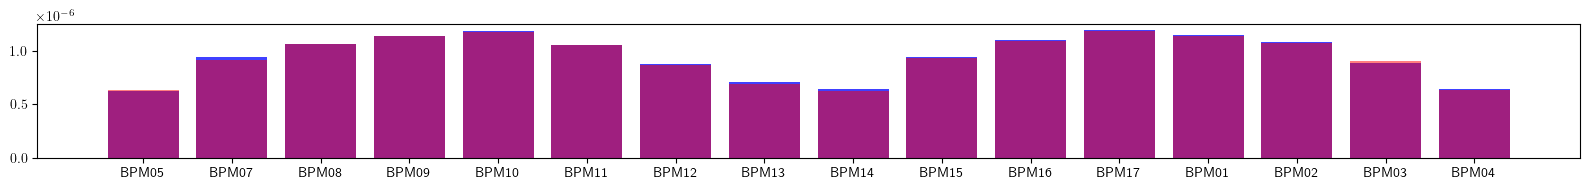

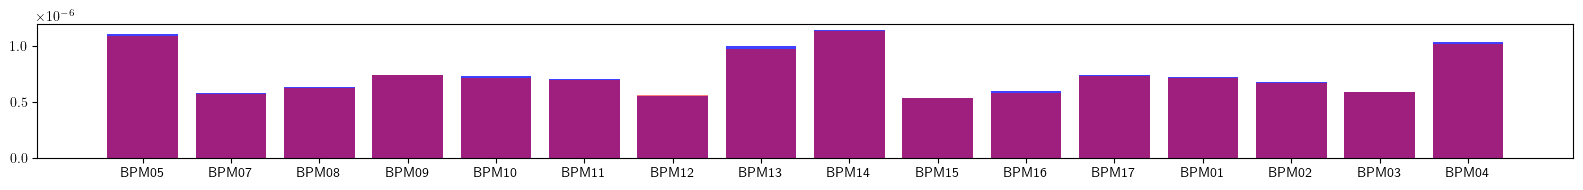

In [12]:
# Plot (compare estimated spreads)

plt.figure(figsize=(16, 2))
plt.bar(range(len(ring.locations())), qx_spread_tracking.cpu().numpy(), color='blue',alpha=0.75)
plt.bar(range(len(ring.locations())), qx_spread_taylor.cpu().numpy(), color='red', alpha=0.50)
plt.xticks(ticks=range(len(ring.locations())), labels=dict.fromkeys([name for name, kind, *_ in ring.layout() if kind == 'BPM']))
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 2))
plt.bar(range(len(ring.locations())), qy_spread_tracking.cpu().numpy(), color='blue',alpha=0.75)
plt.bar(range(len(ring.locations())), qy_spread_taylor.cpu().numpy(), color='red', alpha=0.50)
plt.xticks(ticks=range(len(ring.locations())), labels=dict.fromkeys([name for name, kind, *_ in ring.layout() if kind == 'BPM']))
plt.tight_layout()
plt.show()